<h1> SONIFICATION STRATEGIES FOR DEEP-SPACE MATERIALS

___

<h2> II. Pulsars

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
pulsar_data = pd.read_csv('DATA/pulsar_candidates/pulsar_data_train.csv', low_memory=False)

In [3]:
pulsar_data.shape

(12528, 9)

In [4]:
pulsar_data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


---

In [5]:
def plot_cols(col1, col2, rng=(0,pulsar_data.shape[0])):
    plt.figure(figsize=(18,5))
    plt.plot(col1)
    plt.plot(col2)
    plt.xlim((rng[0],rng[1]))
    return plt.show()

The dataset consists of 8 parameters, several of which are related.  The goal is to find which parameters either track with or complement each other so that they can be mapped to similar sonic parameters, creating a more cohesive auditory model.  

### Mean of the Integrated Profile vs. Standard Deviation of the Integrated Profile

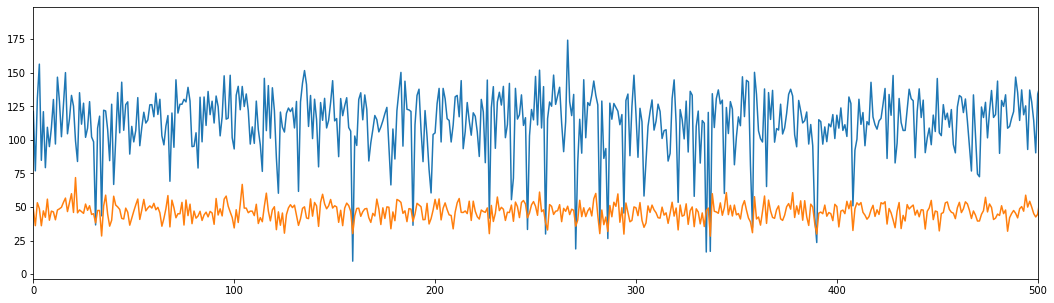

In [6]:
plot_cols(pulsar_data.iloc[:,0], pulsar_data.iloc[:,1], (0,500))

In [34]:
def scale_col(col, rng=(-1,1)):
    return np.interp(col, (col.min(), col.max()), rng) 

In [35]:
norm_mean = scale_col(pulsar_data.iloc[:,0])
norm_std = scale_col(pulsar_data.iloc[:,1])

After scaling, these parameters track closely and could be used to modulate similarly related sonic parameters.

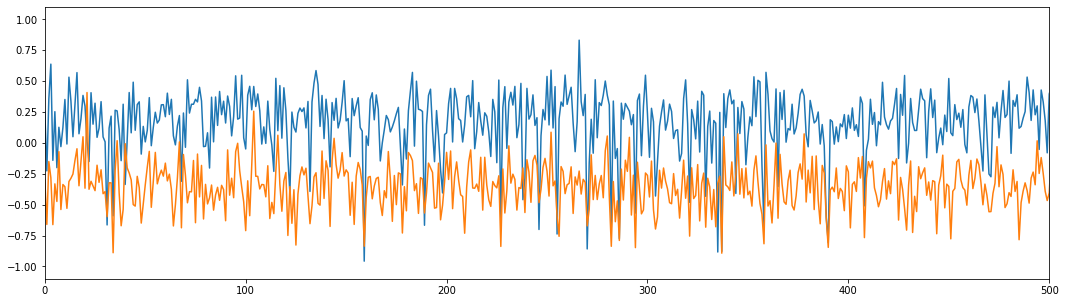

In [36]:
plot_cols(norm_mean, norm_std, (0,500))

### A similar comparison of the Mean of the DM-SNR Curve and its Standard Deviation

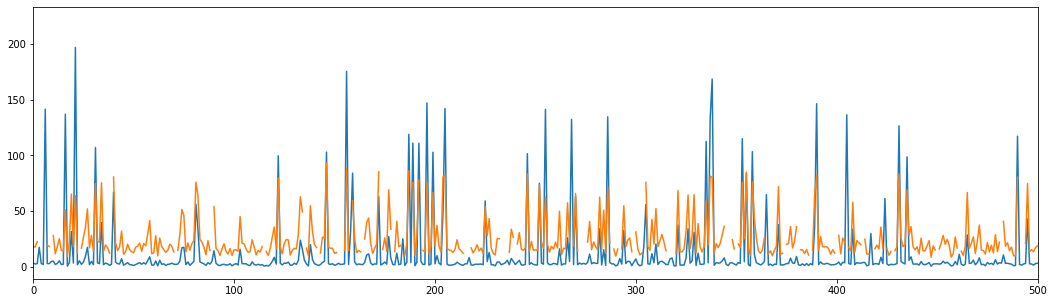

In [37]:
plot_cols(pulsar_data.iloc[:,4], pulsar_data.iloc[:,5], (0,500))

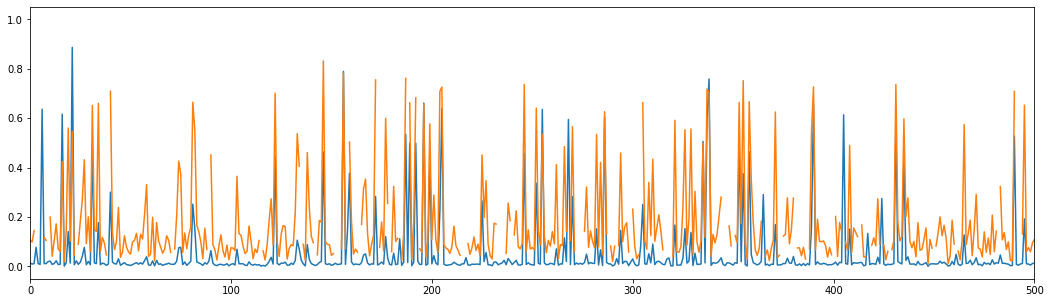

In [45]:
plot_cols(scale_col(pulsar_data.iloc[:,4], (0,1)), scale_col(pulsar_data.iloc[:,5], (0,1)), (0,500))

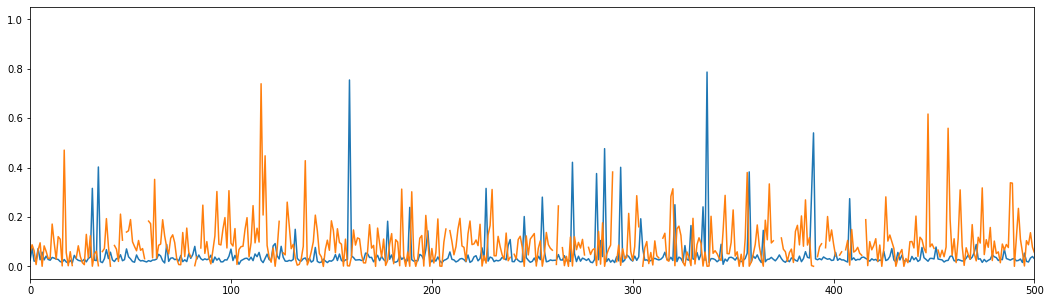

In [44]:
plot_cols(scale_col(pulsar_data.iloc[:,3], (0,1)), scale_col(pulsar_data.iloc[:,7], (0,1)), (0,500))

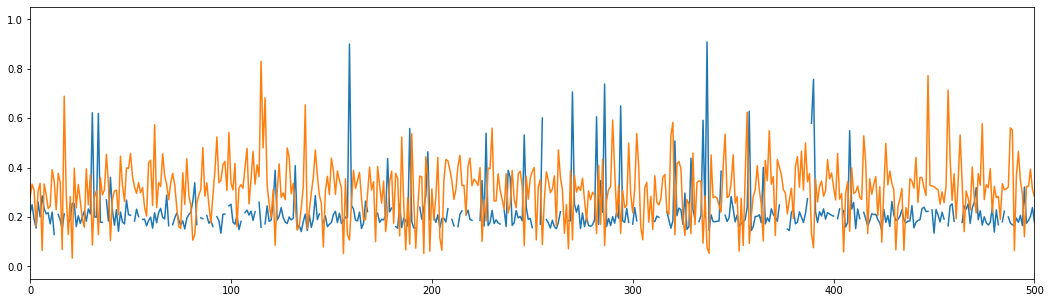

In [43]:
plot_cols(scale_col(pulsar_data.iloc[:,2], (0,1)), scale_col(pulsar_data.iloc[:,6], (0,1)), (0,500))

In [12]:
# f = open('pulsars_data.txt', 'w')
# for row in range(pulsar_data.shape[0]):
#     f.write(str(row) + ', ')
#     f.write(pulsar_data.iloc[row,0].astype(str) + ' ')
#     f.write(pulsar_data.iloc[row,1].astype(str) + ' ')
#     f.write(pulsar_data.iloc[row,2].astype(str) + ' ')
#     f.write(pulsar_data.iloc[row,3].astype(str) + ';\n')
# f.close()

---